In [26]:
#Loading modules needed 
import numpy as np
import os 
import matplotlib.pyplot as plt
import cv2
import glob
import pandas as pd
from PIL import Image
from scipy import misc
import imageio

# example of brighting image augmentation increase data size 
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# save numpy array as npy file
from numpy import asarray
from numpy import save

Using TensorFlow backend.


### Loading in the images

In [2]:
#Loading Images in
filenames = glob.glob('data/*.*g')
print("Number of images: ", len(filenames))

Number of images:  1081


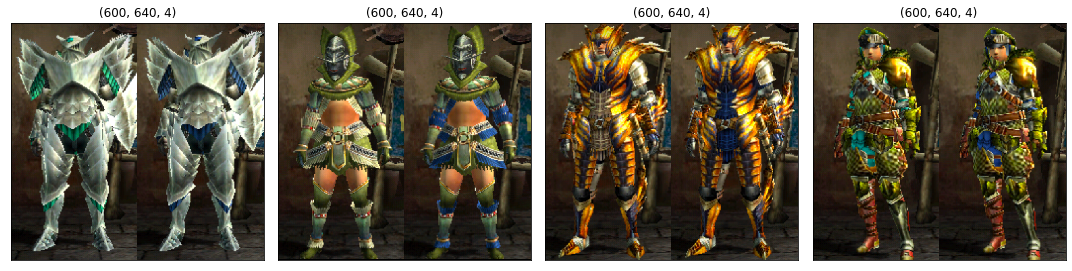

In [3]:
#Plotting the images 
plt.figure(figsize = (15,12))
for i in range(4):
    img = plt.imread(filenames[i])
    plt.subplot(1,4, i + 1)
    plt.imshow(img)
    plt.title(img.shape)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

### Splitting the image in two

In [4]:
#Splitting Image in Half 
s = []
for i in range(1081):
# Read the image
    img = imageio.imread(filenames[i])
    height, width, color = img.shape

# Cut the image in half
    width_cutoff = width // 2
    s1 = img[:, :width_cutoff]
    s2 = img[:, width_cutoff:]
    
    s.append(s1)
    s.append(s2)

In [7]:
#check the number of images
len(s) == 2162

True

In [8]:
#Loading Images in from singles, some of the armor didn't have another color 
single = glob.glob('single/*.*g')
print("Number of images: ", len(single))

Number of images:  10


In [9]:
#Adding single images to our list 
for i in range(10):
    img = imageio.imread(single[i])
    height, width, color = img.shape
    s1 = img
    s.append(s1)

In [10]:
#Check number of images
len(s) == 2172

True

### Data Augmentation Mirror images

In [11]:
#Switch to array to be able to flip the images (create mirror images)
type(s)
myarray = np.asarray(s)

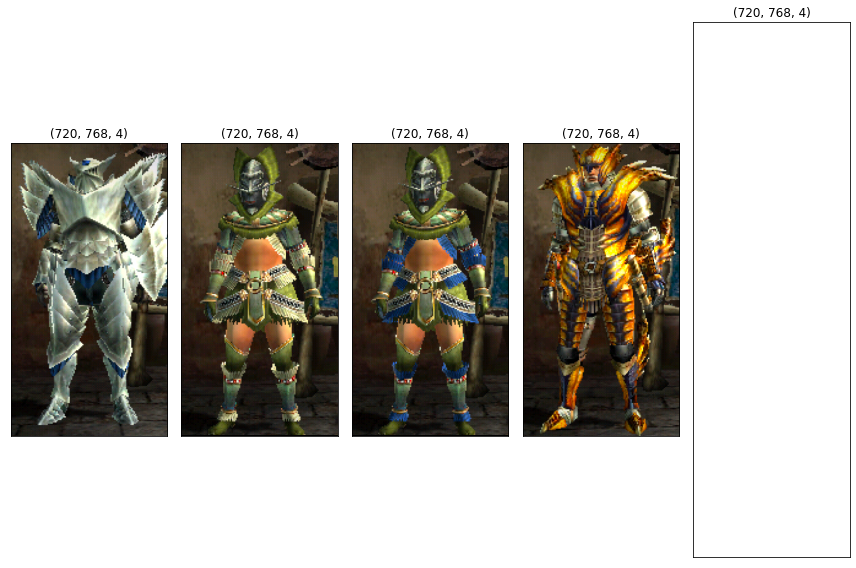

In [12]:
#Check if it worked 
plt.figure(figsize = (12,8))
for i in range(5):
    plt.imshow(myarray[0+i])
    plt.subplot(1,5,i+1)
    plt.title(img.shape)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

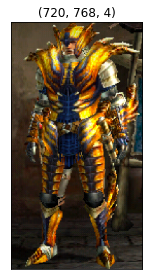

In [13]:
#No idea why the 5th image shows a blank 
plt.imshow(myarray[5])
plt.title(img.shape)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [18]:
#Flipping the images to get more data
flip_img = []
for i in range(2172):
    flip = np.fliplr(myarray[i])
    flip_img.append(flip)

In [22]:
joinedlist = s + flip_img

In [25]:
combarray = np.asarray(joinedlist)

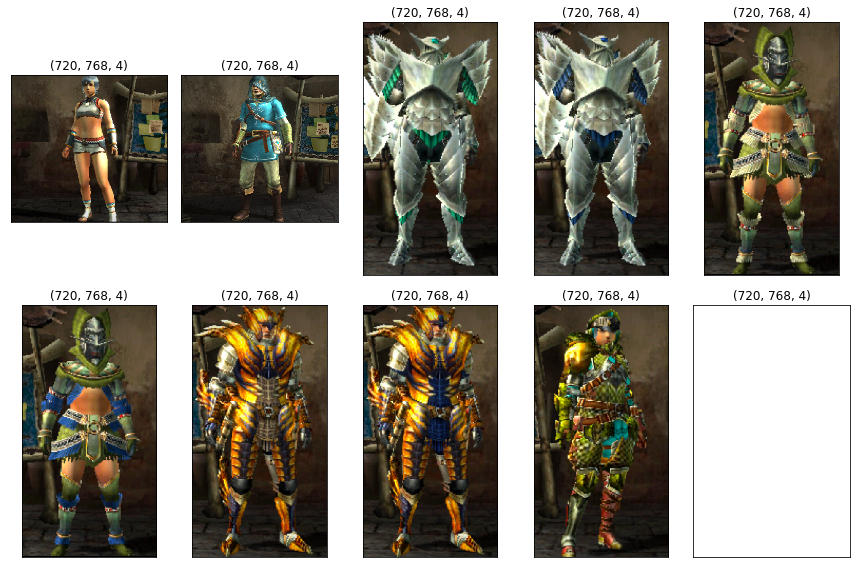

In [28]:
#Check if it worked 
plt.figure(figsize = (12,8))
for i in range(10):
    plt.imshow(combarray[2169+i])
    plt.subplot(2,5,i+1)
    plt.title(img.shape)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [43]:
len(combarray)

4344

In [ ]:
#Changing Channels from 4 to 3 

In [44]:
#RGB channel 4 to 3 
img_l = []
for i in range(4344):
    img = cv2.cvtColor(combarray[i], cv2.COLOR_BGRA2BGR)
    img_l.append(img)

In [46]:
thre_array = np.asarray(img_l)

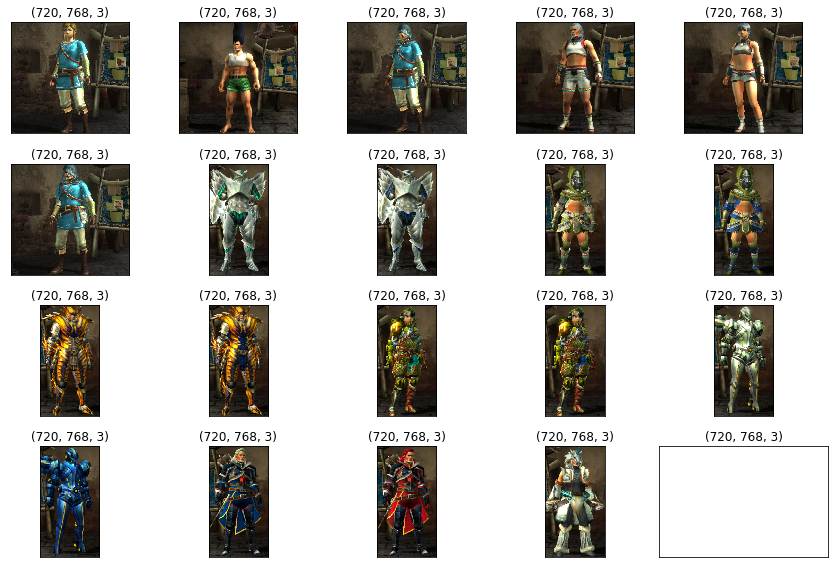

In [48]:
#Check if it worked 
plt.figure(figsize = (12,8))
for i in range(20):
    plt.imshow(thre_array[2165+i])
    plt.subplot(4,5,i+1)
    plt.title(img.shape)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

### Data Augmentation changing brightness to get more data 

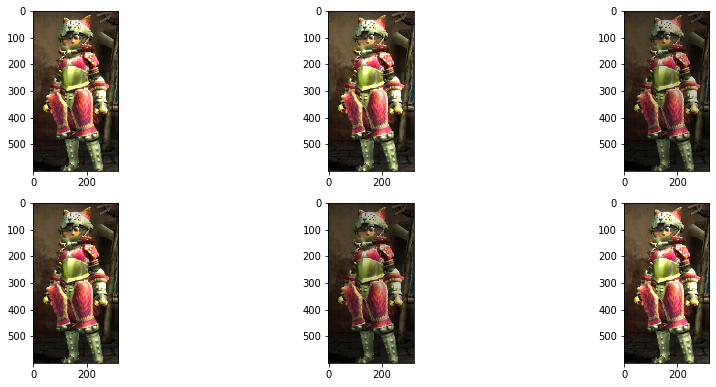

In [167]:
#Testing brightness and dimness to increase dataset 

data = thre_array[1000]
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.7,1.2])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
plt.figure(figsize = (15,10))

for i in range(6):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
pyplot.show()

/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


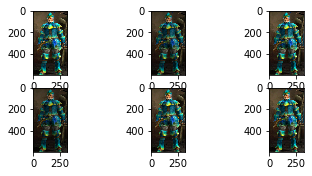

In [202]:
#Have to split into 4 as aug only goes to 9999
for i in range(1000):
    data = thre_array[i]
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(brightness_range=[0.7,1.2])
    # prepare iterator
    it = datagen.flow(samples, batch_size=1, save_to_dir='images', save_prefix='aug', save_format='jpeg')
    for i in range(6):
        # define subplot
        plt.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        plt.imshow(image)

/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


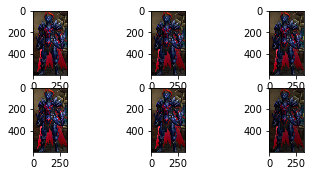

In [203]:
for i in range(1000,2000,1):
    data = thre_array[i]
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(brightness_range=[0.7,1.2])
    # prepare iterator
    it = datagen.flow(samples, batch_size=1, save_to_dir='images1', save_prefix='aug', save_format='jpeg')
    for i in range(6):
        # define subplot
        plt.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        plt.imshow(image)

/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


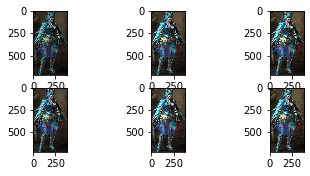

In [204]:
for i in range(2000,3000,1):
    data = thre_array[i]
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(brightness_range=[0.7,1.2])
    # prepare iterator
    it = datagen.flow(samples, batch_size=1, save_to_dir='images2', save_prefix='aug', save_format='jpeg')
    for i in range(6):
        # define subplot
        plt.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        plt.imshow(image)

/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


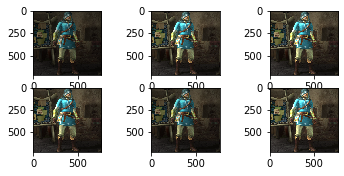

In [205]:
for i in range(3000,4344,1):
    data = thre_array[i]
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(brightness_range=[0.7,1.2])
    # prepare iterator
    it = datagen.flow(samples, batch_size=1, save_to_dir='images3', save_prefix='aug', save_format='jpeg')
    for i in range(6):
        # define subplot
        plt.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        plt.imshow(image)

In [3]:
#Loading Images in again now that we have augmented our data. 
filenames = glob.glob('images*/*.*g')
print("Number of images: ", len(filenames))

Number of images:  19488


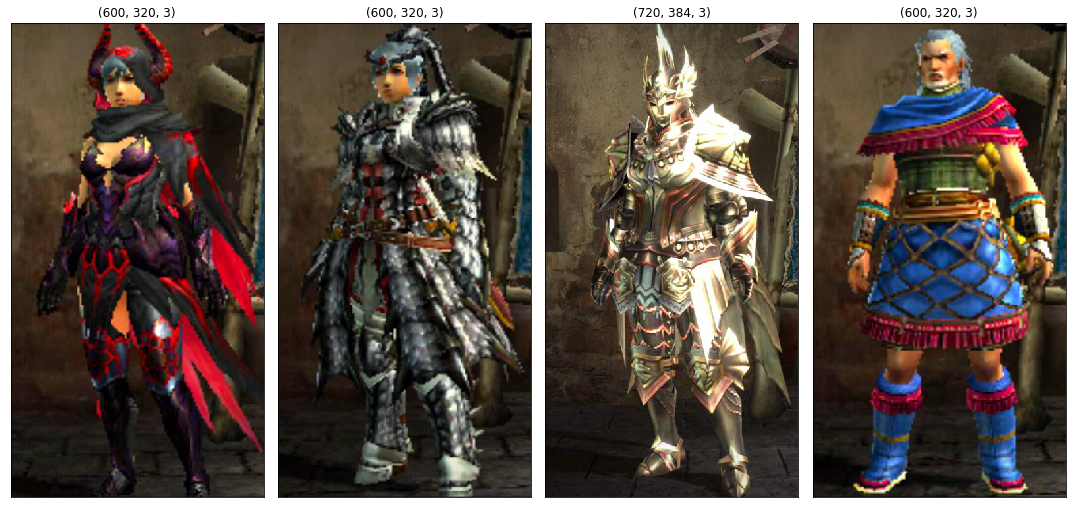

In [4]:
#Looking at our images to see if they are the right channel 
plt.figure(figsize = (15,12))
for i in range(4):
    img = plt.imread(filenames[i])
    plt.subplot(1,4, i + 1)
    plt.imshow(img)
    plt.title(img.shape)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [4]:
#appending it to list 
aug_list = []
for i in range(19488):
# Read the image
    img = imageio.imread(filenames[i])
    aug_list.append(img)

In [5]:
#Change to numpy array 
aug_array = np.asarray(aug_list)

In [9]:
#save npy files to jpeg for photoshop resolution increase 
for i in range(19488):
    img = Image.fromarray(aug_array[i], 'RGB')
    img.save(f'dataset/mhxx{i}.jpeg')

### Increase Resolution using Photoshop.  

In [15]:
#Load in data to look 
#Using another neural network would take to long. Took about 1 hour to do all 19488 images
#realized I had a top body image so removed one observation during the process so now have 19487 images 
filenames = glob.glob('mhxx_800px/*.*g')
print("Number of images: ", len(filenames))

Number of images:  19487


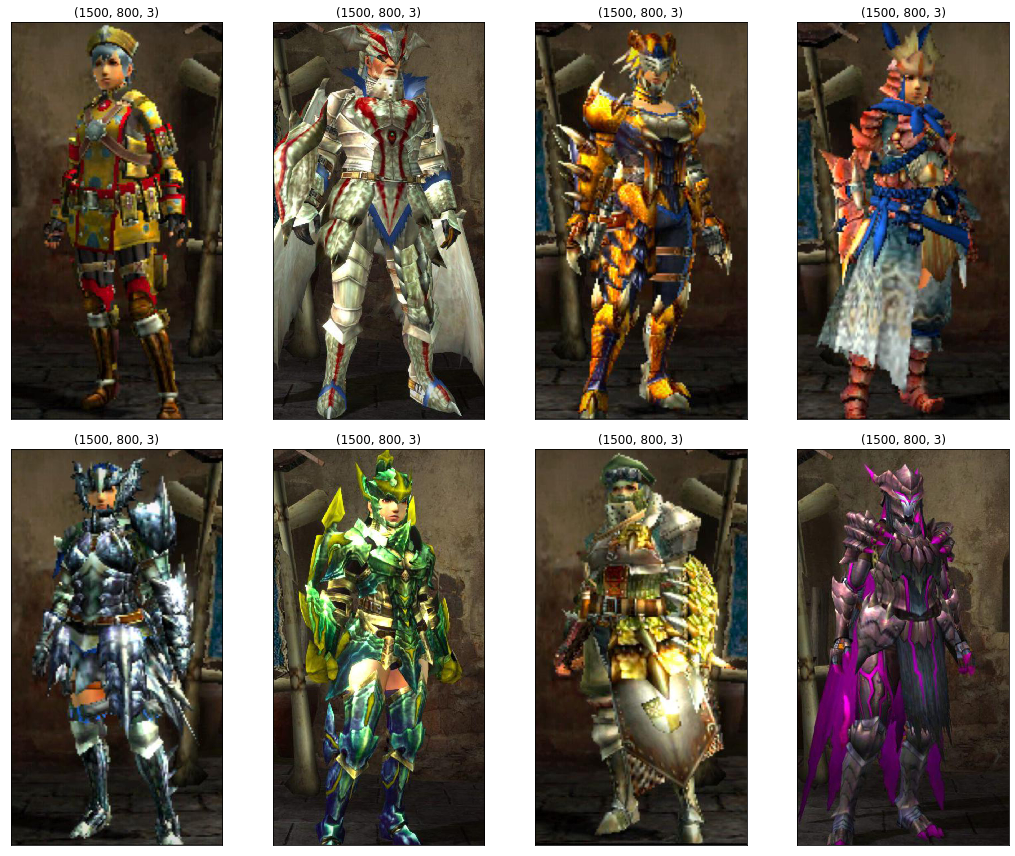

In [20]:
#Looking at higher resolution images set at 800 px in photoshop 
#checking at 500th image 
plt.figure(figsize = (15,12))
for i in range(8):
    img = plt.imread(filenames[i+500])
    plt.subplot(2,4, i + 1)
    plt.imshow(img)
    plt.title(img.shape)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

### Formatting the images to 256 x 256 for TFrecords

In [5]:
#256x256 from the photoshop increased image
#The files will be saved in a newly created folder called output 
import Augmentor 
p = Augmentor.Pipeline('mhxx_800px')
p.resize(probability = 1.0, width = 256, height = 256)
p.random_color(probability = 1.0, min_factor = 0.5, max_factor = 0.9)

Initialised with 19487 image(s) found.
Output directory set to mhxx_800px/output.

In [8]:
#Now transform all our images to 256x256
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
p.process()

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x118E5B080>:  99%|█████████▉| 19269/19487 [02:00<00:00, 1339.59 Samples/s]

In [9]:
#Using pytorch fastai to weed out any images that can't be used
#made a seperate folder to store the 256x256 images 
from fastai.vision import *
verify_images('mhxx_800px/output/', delete = True)

In [22]:
#Loading Images in again to check if we have the right format for tfrecords
filenames = glob.glob('mhxx_800px/output/*.*g')
print("Number of images: ", len(filenames))

Number of images:  19487


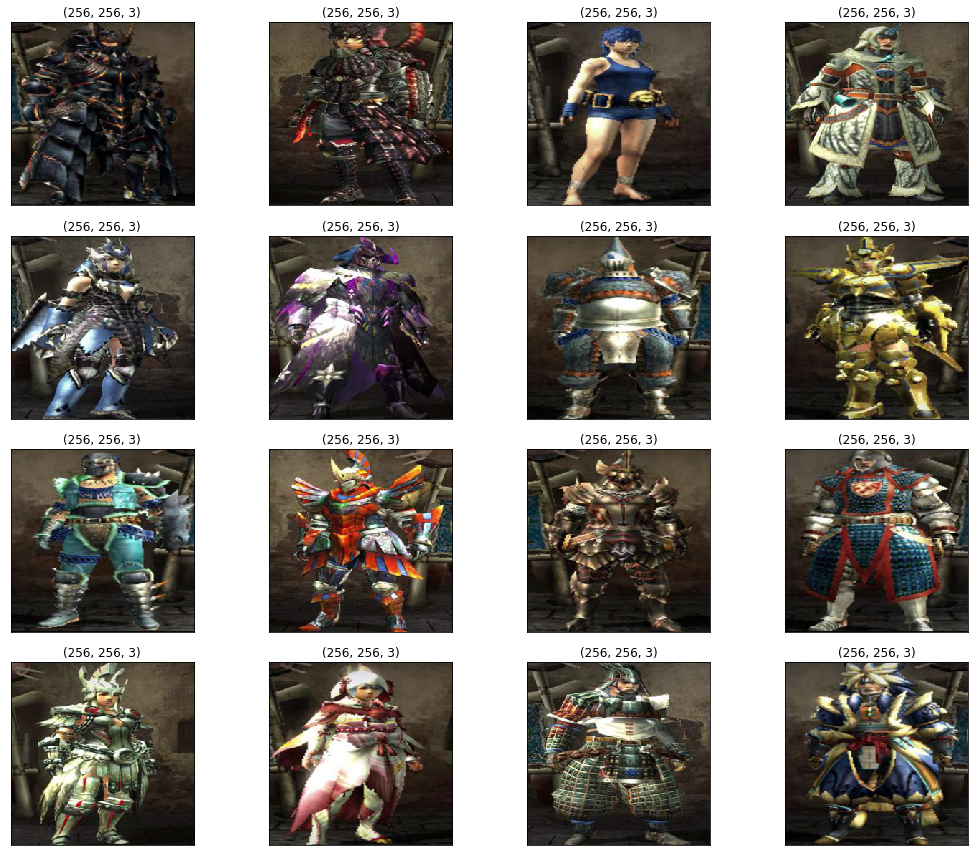

In [24]:
plt.figure(figsize = (15,12))
for i in range(16):
    img = plt.imread(filenames[i+777])
    plt.subplot(4,4, i + 1)
    plt.imshow(img)
    plt.title(img.shape)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
#To change to tfrecords 
#in command line: 
# python dataset_tool.py create_from_images datasets/mhxx_256/ /mhxx_armor/stylegan/output/
# create_from_images function to turn into tfrecords
#first part is where the data will be put into so create a folder with !mkdir mhxx_256
#second part is where data is gotten from 

### Saving to numpy array in case someone wants to use dataset 

In [25]:
#have to spit the data int two since high resolution images 
high_res = []
for i in range(19487):
# Read the image
    img = imageio.imread(filenames[i])
    high_res.append(img)

In [8]:
high_array = np.asarray(high_res)

In [ ]:
# save to npy file
save('mhxx.npy', high_array1)